# Introduction:

Recommendation Engine:

A recommendation engine (or recommendation system) is a type of information filtering system designed to predict and present items (movies, books, products, etc.) that a user may be interested in. Recommendation engines are widely used in various domains, from e-commerce websites like Amazon to streaming services like Netflix. Key characteristics include:

Personalization: Tailoring recommendations to individual user preferences.

Source: https://grouplens.org/datasets/movielens/ , Week 3 Assignment Input 


# Importing Libraries

In [30]:
import pandas as pd
import numpy as np
import seaborn as  sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Reading all the input files

In [3]:
user_data = pd.read_csv("./Recommendation_data/users.csv")
movies_data = pd.read_csv("./Recommendation_data/movies.csv")
train_data = pd.read_csv("./Recommendation_data/train.csv")
test_data = pd.read_csv("./Recommendation_data/test.csv")

Printing top 5 records of all the 4 input files

In [4]:
user_data.head(5)

,uID,gender,age,accupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
movies_data.head(5)

,mID,title,year,Doc,Com,Hor,Adv,Wes,Dra,Ani,...,Chi,Cri,Thr,Sci,Mys,Rom,Fil,Fan,Act,Mus
0,1,Toy Story,1995,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1995,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,3,Grumpier Old Men,1995,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II,1995,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_data.head(5)

,uID,mID,rating
0,744,1210,5
1,3040,1584,4
2,1451,1293,5
3,5455,3176,2
4,2507,3074,5


In [7]:
test_data.head(5)

,uID,mID,rating
0,2233,440,4
1,4274,587,5
2,2498,454,3
3,2868,2336,5
4,1636,2686,5


# As part of the initial exploration, we will try to answer the following questions. 

1. How many nulls are there in each of the columns. 
2. Distribution - Age group of user ratings. Which age group provides more ratings. 
3. Which Gender provides more ratings. Male or Female.
4. Age Group and Gender  - Min, Max and Average Age group of rated users.   
5. How has been the growth of movies over the years.

In [8]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   uID         6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   accupation  6040 non-null   int64 
 4   zip         6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [9]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mID     3883 non-null   int64 
 1   title   3883 non-null   object
 2   year    3883 non-null   int64 
 3   Doc     3883 non-null   int64 
 4   Com     3883 non-null   int64 
 5   Hor     3883 non-null   int64 
 6   Adv     3883 non-null   int64 
 7   Wes     3883 non-null   int64 
 8   Dra     3883 non-null   int64 
 9   Ani     3883 non-null   int64 
 10  War     3883 non-null   int64 
 11  Chi     3883 non-null   int64 
 12  Cri     3883 non-null   int64 
 13  Thr     3883 non-null   int64 
 14  Sci     3883 non-null   int64 
 15  Mys     3883 non-null   int64 
 16  Rom     3883 non-null   int64 
 17  Fil     3883 non-null   int64 
 18  Fan     3883 non-null   int64 
 19  Act     3883 non-null   int64 
 20  Mus     3883 non-null   int64 
dtypes: int64(20), object(1)
memory usage: 637.2+ KB


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700146 entries, 0 to 700145
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   uID     700146 non-null  int64
 1   mID     700146 non-null  int64
 2   rating  700146 non-null  int64
dtypes: int64(3)
memory usage: 16.0 MB


In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300063 entries, 0 to 300062
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   uID     300063 non-null  int64
 1   mID     300063 non-null  int64
 2   rating  300063 non-null  int64
dtypes: int64(3)
memory usage: 6.9 MB


<AxesSubplot:>

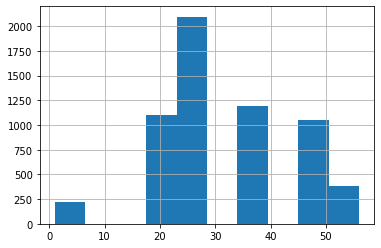

In [12]:
user_data['age'].hist()

In [13]:
user_data['gender'].value_counts()

M    4331
F    1709
Name: gender, dtype: int64

In [14]:
user_data[['gender','age']].groupby(['gender']).mean().reset_index()

,gender,age
0,F,30.859567
1,M,30.552297


In [15]:
user_data[['gender','age']].groupby(['gender']).min().reset_index()

,gender,age
0,F,1
1,M,1


In [16]:
user_data[['gender','age']].groupby(['gender']).max().reset_index()

,gender,age
0,F,56
1,M,56


In [19]:
movies_data1=movies_data[['year','mID']].groupby(['year']).count().reset_index()

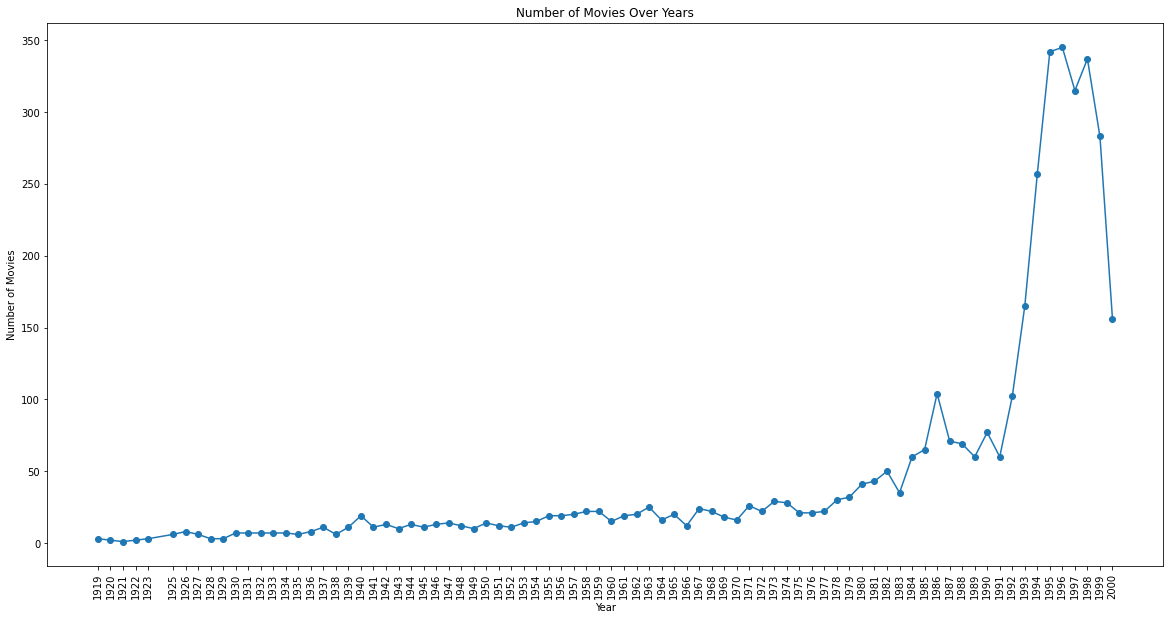

In [26]:
plt.figure(figsize=(20, 10))
plt.plot(movies_data1['year'], movies_data1['mID'], marker='o')
plt.title('Number of Movies Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(movies_data1['year'],rotation='vertical')  
plt.show()

# User based recommendations

In user based recommendations, the users are recommended movies based on the ratings given to a particular movie. The steps are as follows:

User item matrix would be created with users in rows and movies in columns. 

Similarity between users would be computed. This would be either through Cosine Similarity or Jaccard Similarity. 

Find most similar users. 

Predict the user rating by averaging the ratings based on user's nearest neighbours. Recommend the movie to users based on that

In [37]:
user_movie_matrix = train_data.pivot(index='uID', columns='mID', values='rating').fillna(0)
sparse_matrix = csr_matrix(user_movie_matrix.values)
user_similarity = cosine_similarity(sparse_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_movie_matrix.index, columns=user_movie_matrix.index)

def get_user_based_recommendations(user_id, user_similarity_df, user_movie_matrix, n_recommendations=5):
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).index[1:]
    similar_users_ratings = user_movie_matrix.loc[similar_users]
    movie_recommendation_scores = similar_users_ratings.mean(axis=0)
    movie_recommendations = movie_recommendation_scores.sort_values(ascending=False)
    already_watched_indices = user_movie_matrix.loc[user_id].loc[user_movie_matrix.loc[user_id] > 0].index
    movie_recommendations = movie_recommendations.loc[~movie_recommendations.index.isin(already_watched_indices)]
    top_movie_recommendations = movie_recommendations.head(n_recommendations).index
    top_movie_titles = movies_data[movies_data['mID'].isin(top_movie_recommendations)]['title']
    return top_movie_titles

user_id = 100
recommended_movies = get_user_based_recommendations(user_id, user_similarity_df, user_movie_matrix)


589                          Silence of the Lambs, The
1178    Star Wars: Episode V - The Empire Strikes Back
1959                               Saving Private Ryan
2693                                  Sixth Sense, The
2789                                   American Beauty
Name: title, dtype: object


# Movie based recommendations

In movie based recommendations, the movie are recommended movies based on the similarity between movies. The steps are as follows:

User item matrix would be created with users in rows and movies in columns. 

Similarity between movies would be computed. This would be either through Cosine Similarity or Jaccard Similarity. 

Find most similar movies.

In [39]:
user_movie_matrix = train_data.pivot(index='uID', columns='mID', values='rating').fillna(0)
movie_similarity = cosine_similarity(user_movie_matrix.T)
movie_similarity_df = pd.DataFrame(movie_similarity, index=user_movie_matrix.columns, columns=user_movie_matrix.columns)

def get_movie_based_recommendations(movie_id, movie_similarity_df, n_recommendations=5):
    sim_scores = movie_similarity_df[movie_id]
    sim_scores = sim_scores.sort_values(ascending=False)
    top_movie_indices = sim_scores.iloc[1:n_recommendations+1].index
    top_movie_titles = movies_data[movies_data['mID'].isin(top_movie_indices)]['title']
    return top_movie_titles

movie_id = 100
recommended_movies = get_movie_based_recommendations(movie_id, movie_similarity_df)
print(recommended_movies)

277     Murder in the First
486                  Malice
1548               Cop Land
1746         Primary Colors
2951           Falling Down
Name: title, dtype: object


# Conclusion/ Future Work

1. The above approach  was a simple approach where user based similarity and movie based similarity was computed. 
2. There can be other approaches such as Hybrid recommendation system which combines the best of both content based recommendation system and colloborative based recommendation system. 
3. There can be deep learning based approaches such as embeddings which can take both user and item interactions, create an embedding and then use that as input to the recommendation system. 